<a href="https://colab.research.google.com/github/Reddy9949/Reddy9949/blob/main/IMDB%20analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
# dataset 

train_data, validation_data, test_data = tfds.load(
    name="imdb_reviews", 
    split=('train[:60%]', 'train[60%:]', 'test'),
    as_supervised=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteQ07TAQ/imdb_reviews-train.tfrecord*...…

Generating test examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteQ07TAQ/imdb_reviews-test.tfrecord*...:…

Generating unsupervised examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteQ07TAQ/imdb_reviews-unsupervised.tfrec…

Dataset imdb_reviews downloaded and prepared to ~/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [3]:
## hub layer
embedding = "https://tfhub.dev/google/tf2-preview/gnews-swivel-20dim/1"
hub_layer = hub.KerasLayer(embedding, input_shape=[], 
                           dtype=tf.string, trainable=True)

In [4]:
# model

model = tf.keras.Sequential()
model.add(hub_layer)
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(1))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 20)                400020    
                                                                 
 dense (Dense)               (None, 16)                336       
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 400,373
Trainable params: 400,373
Non-trainable params: 0
_________________________________________________________________


In [6]:
## compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [7]:
## evaluating the model 
results = model.evaluate(test_data.batch(512), verbose=2)

49/49 - 4s - loss: 0.7749 - accuracy: 0.5136 - 4s/epoch - 76ms/step


In [8]:
for name, value in zip(model.metrics_names, results):
    print("%s: %.3f" % (name, value))

loss: 0.775
accuracy: 0.514


In [9]:
## training

history = model.fit(train_data.batch(512), epochs=20, verbose=1)

Epoch 1/20
30/30 [==============================] - 3s 71ms/step - loss: 0.7178 - accuracy: 0.5432
Epoch 2/20
30/30 [==============================] - 2s 66ms/step - loss: 0.6305 - accuracy: 0.6178
Epoch 3/20
30/30 [==============================] - 2s 64ms/step - loss: 0.5828 - accuracy: 0.6665
Epoch 4/20
30/30 [==============================] - 2s 66ms/step - loss: 0.5436 - accuracy: 0.7025
Epoch 5/20
30/30 [==============================] - 2s 57ms/step - loss: 0.5052 - accuracy: 0.7349
Epoch 6/20
30/30 [==============================] - 2s 59ms/step - loss: 0.4653 - accuracy: 0.7665
Epoch 7/20
30/30 [==============================] - 2s 60ms/step - loss: 0.4256 - accuracy: 0.7977
Epoch 8/20
30/30 [==============================] - 2s 58ms/step - loss: 0.3885 - accuracy: 0.8231
Epoch 9/20
30/30 [==============================] - 2s 61ms/step - loss: 0.3555 - accuracy: 0.8427
Epoch 10/20
30/30 [==============================] - 2s 61ms/step - loss: 0.3264 - accuracy: 0.8581
Epoch 11/

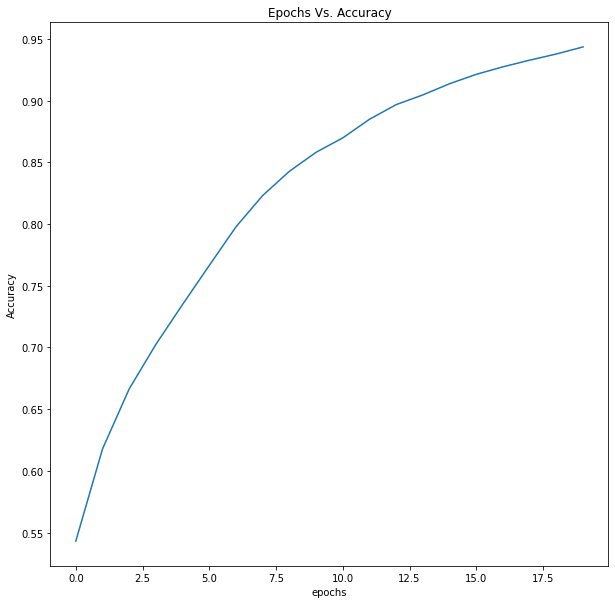

In [10]:
## accuracy vs epoch graph

plt.figure(figsize=(10, 10))
plt.plot(history.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.title('Epochs Vs. Accuracy');

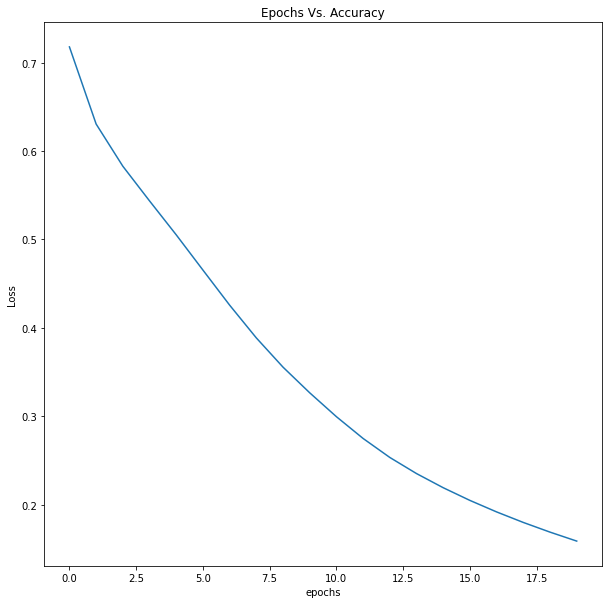

In [11]:
## Loss vs Epoch graph

plt.figure(figsize=(10, 10))
plt.plot(history.history['loss'])
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.title('Epochs Vs. Accuracy');